In [99]:
import math
import matplotlib.pyplot as plt
import random

In [100]:
def find_vector_of_stimulus(waveform, time_of_spike, num_dimensions, sampling_rate):
    output_vector = []

    prev_time = time_of_spike - (num_dimensions * sampling_rate)
    while prev_time < num_dimensions:
        output_vector.append(waveform[prev_time])
        prev_time += sampling_rate
    
    return output_vector

In [101]:
def find_stimulus_triggered_average(stimulus_vectors):
    average_vector = []

    num_stimuli = stimulus_vectors.size()
    stimulus_duration = stimulus_vectors[0].size()

    for time in range(stimulus_duration):
        sum = 0
        for stimulus in range(num_stimuli):
            sum += stimulus_vectors[stimulus][time]
        average_vector.append(sum / num_stimuli)
    
    return average_vector


In [102]:
def plot_hist(data, bins=100):
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title("Histogram")
    plt.show()


In [103]:
def generate_gaussian_white_noise(mean, variance, required_num_samples):

    std_deviation = math.sqrt(variance)

    def pdf(x):
        coeff = 1 / (std_deviation * math.sqrt(2 * math.pi))
        euler_exponent = -0.5 * (((x - mean) / std_deviation) ** 2)
        return coeff * math.exp(euler_exponent)

    lower_limit = mean - (4 * std_deviation)
    M = pdf(mean)

    samples = []

    while len(samples) < required_num_samples:
        x = lower_limit + (8 * std_deviation * random.random())
        u = random.random()
        if u < pdf(x)/M:
            samples.append(x)

    return samples



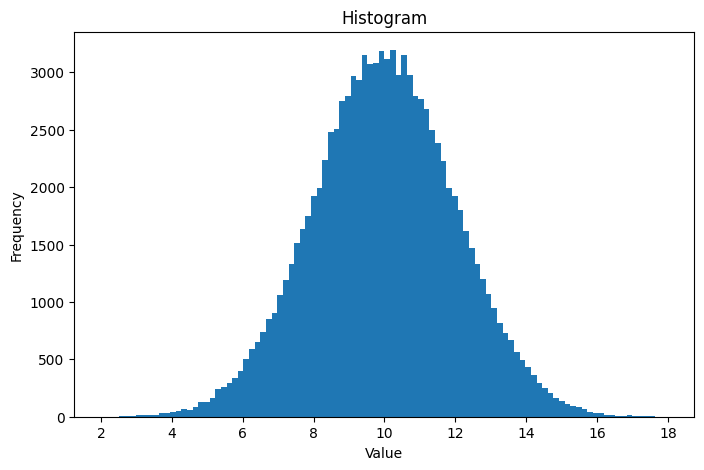

In [104]:
output = generate_gaussian_white_noise(10, 4, 100000)
plot_hist(output)